# Preamble
The codeblocks below are there to important the right packages, provide some helper functions, and hardcode a number of often used values. If you find yourself needed to make adjustments to these codeblocks to make the code work, please let us know as this most likely means that something has gone wrong in our implementation.

In [ ]:
!pip install torchvision # This can take a very long time to run

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.5 MB/s eta 0:00:00


In [ ]:
%matplotlib inline

In [ ]:
import torch
import numpy as np

from tqdm import tqdm

import torch.distributions as D

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation

import matplotlib.patches as mpatches
from scipy.stats import norm
from IPython.display import HTML

import requests
from PIL import Image
from io import BytesIO
import torchvision.transforms.functional as TF

In [ ]:
def reset_seeds(seed=42):
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.backends.cudnn.deterministic = True
  np.random.seed(seed)

# Number of samples used for MC integration
N = 10000

# Administrative Information
Again, please note that none of the tasks set are supposed to be extremely challenging and if you do run into any problems, chances are high that this is due to unclarity on our side. As such, if you are stuck on a task for a longer time, do please reach out to lars@aims.ac.za

The notebooks are roughly structured as follows:
- Coding tasks and questions are mixed together and are highlighted by the keyword: "**Task**".
- Depending on what the task is acking for, the task will be followed by either a codeblock containing some pre-writen helper code and a `#Todo` flag after which you can add your implementation, or a markdown block containing the keyword "*Answer:*" for you to provide your answer.
- Some tasks are followed by a "**Hint:**" which will contain some extra instructions for the coding implementations, or it might point you towards the right answer to a question.
- At the end of each notebook we will have a short section with additional challenging extensions that you could choose to work on if you found a topic interesting. Please note that you are not required to do these extensions. Solving one or more of the extensions does **not** by definition result in a higher grade for the course.

Lastly, to help us in improving the coding assignments in the following weeks, please fill in the anonymous feedback [form](https://forms.gle/vVBXm7nhW94yMkHr8) (you can do this for every assigment, just make sure to pick the correct day you just finished in the shee). We highly appreciate your feedback, positive and negative!

# Markov Models
Markov Models are a special kind of structured Graphical Model where each variabel $\mathbf{x}_t$ is conditionally independent of all variables in the past ($\mathbf{x}_{t-2}, \dots, \mathbf{x}_0$) given $\mathbf{x}_{t-1}$. As a direct result of this conditional independence we are able to factorize the joint probability in a product of conditionals:
\begin{align}
    P(\mathbf x_0,\ldots,\mathbf x_T) = P_0(\mathbf x_0)\prod_{t=1}^T P_t(\mathbf x_t|\mathbf x_{t-1}),
\end{align}

where each conditional distribution $P_t(\mathbf x_t|\mathbf x_{t-1})$ can be different for every time step.

We can distinguish to different components to the Markov Model, (1) the prior distribution $P_0(\mathbf x_0)$, and (2) the conditional distribution $P_t(\mathbf x_t|\mathbf x_{t-1})$. In the next two sections we will provide a code implementation for them both.


## 1. Prior Distribution
We are first going to consider the prior distribution $P_0(\mathbf x_0)$. For our example we will be using a Gaussian Mixture Model.

> **Task:** Augment the Gaussian Mixture model such that the modes of the Gaussians are no longer regularly spaced but are instead themselves also distributed according to a zero mean Gaussian with unit variance. If anything is unclear, make sure to read the documentation of the Torch.Distribution module.

In [ ]:
torch.rand(5,)

tensor([0.6092, 0.2648, 0.9455, 0.5425, 0.4350])

In [ ]:
reset_seeds()

# Initialize Gaussian Mixture Model (GMM) parameters
mix = D.Categorical(torch.rand(5,))
comp = D.Normal(D.Normal(0,1).sample((5,)),torch.rand(5,))  # TODO: This is the line in which you should make changes
gmm = D.MixtureSameFamily(mix, comp)

# Compute GMM probabilities over a specified range
xs = torch.linspace(-5, 5, 500)
probs = torch.exp(gmm.log_prob(xs))

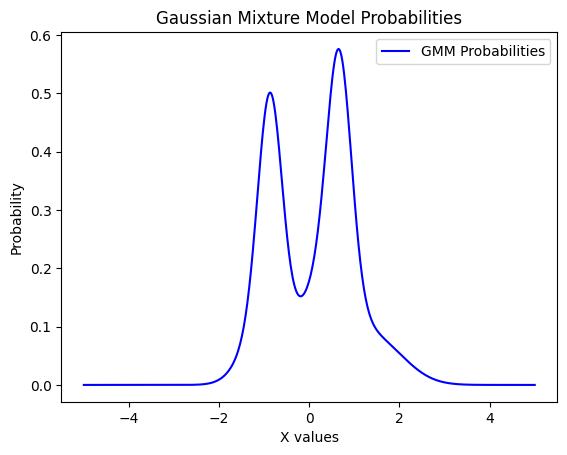

In [ ]:
# Visualizing Gaussian Mixture Model probabilities
plt.plot(xs, probs, label='GMM Probabilities', color='blue')
plt.title('Gaussian Mixture Model Probabilities')
plt.xlabel('X values')
plt.ylabel('Probability')
plt.legend()
plt.show()

> **Task:** During the lecture we had a discussion about the variance of this distribution. Specificaly, we discussed that the distribution above does not have unit variance. Do you recall why we want this distribution with unit variance.

*Answer:* <Answer here>

## 2. Conditional probability distribution
The second component is the conditional distribution $P_t(\mathbf x_t|\mathbf x_{t-1})$. We are in theory free to choose this conditional distribution and it should still result in a Markov Model. The Markov assumption is dependent on the factorization of the model, not on its parameterization. However, in this work we will be choosing a very specific and often used definition for the conditional distribution
$$
P_t(\mathbf x_t|\mathbf x_{t-1}) = \mathcal{N}(\mathbf x_{t+1}; \sqrt{1 - \beta_t} \mathbf x_t, \beta_t \mathbb{I}), \tag{1}
$$
where we observe that $\beta$ is a function of $t$. In other words, the probability distribution $P_t(\mathbf x_t|\mathbf x_{t-1})$ is different for very time step. Concretely, we will use the *noise schedule* $$
0=\beta_0 < \cdots < \beta_T = 1. \tag{2}
$$


> **Task:** With the conditional probabilities defined as eq. (1) and the noise schedule as above, what can we expect the marginal distribution at time T to be distributed as?

*Answer:*

We can expect the marginal distribution at time T to be distributed as a Standard Gaussian distribution $\mathcal{N}(0,\mathbb{I})$.

The next step is to implement eq. 1 in code. For this purpose we first state the following definition of the Gaussian conditional probability as a simple update step
$$
 \mathbf x_{t+1} = \sqrt{1 - \beta_t} \mathbf x_{t} - \sqrt{\beta_t}\mathbf \epsilon_t
$$
where $ϵ_t \sim \mathcal{N}(0, 1)$.

> **Task:** Implement the function below to sample $x_{t+1}$ given $x_{t}$. Similarly, implement the noise schedule function which given a time $t$ returns the noise $\epsilon_t$ for that time step. The scheduler should take both the current step $t$ as well as the total number of steps $T$ as parameters.

**Hint:** The demo showed in class used $\beta_t = t\frac{\beta_{\max} - \beta_{\min}}{T}$, but you are free to choose any scheduler.

In [ ]:
def next_state(current_x, beta):
  # TODO: Fill in the ??
  next_x = torch.sqrt(torch.tensor(1-beta)) * current_x - torch.sqrt(torch.tensor(beta))* torch.randn_like(current_x)
  return next_x

def scheduler(t, T):
  beta_max = 1.
  beta_min = 0.01 # Note that we choose this specifically to not be 0, but instead is slightly positive.
  beta = t*(beta_max -beta_min)/T
  return beta

Using the implemented functions above the code belows samples N samples from our prior distribution and transforms them over time. Following this, we have given code to construct an animation of the sampling process. It is not neccesary to fully understand this code.

> **Task:** Play around with T. What happens when we set T very small (eg. $T=2$). Do we still converge to the Normal distribution?

*Answer:*

with a T  very small value of T, we deviate from the Normal distribution. e.g (with T=2) we don't converge any more to the Normal distribution as illustrated below.

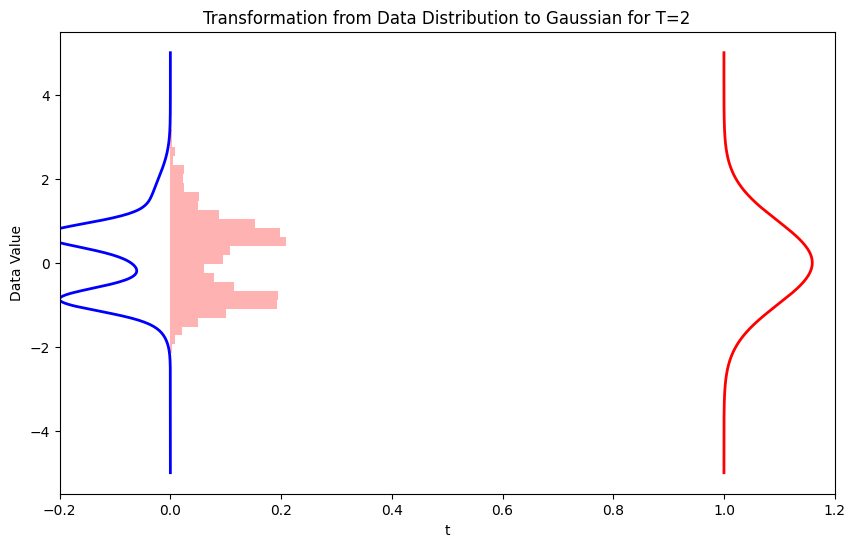

In [ ]:
#@title no convergence for very small T
# Sampling from the GMM and applying a noise process over multiple steps
N = 1000
T = 2

x=gmm.sample((N,))
history = torch.zeros((N, T+1))
history[:, 0] = x.clone()

beta_max = 1.
for t in range(T):
    beta = scheduler(t, T)
    x = next_state(x, beta)
    history[:, t+1] = x.clone()

# NOTE: This code block can takle up to 5 minutes to run.

# indices = [1] # range(10) #range(n_samples)
# show_histogram = False

# indices = range(10) #range(n_samples)
# show_histogram = False

indices = range(N)
show_histogram = True

n_frames = 50

# Generate data for the complex and Gaussian distributions
xs = torch.linspace(-5, 5, 400)
y_complex = torch.exp(gmm.log_prob(xs)) * 0.4

gaussian = D.Normal(0, 1)
y_gaussian = torch.exp(gaussian.log_prob(xs)) * 0.4

# Create the figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the complex data distribution on the left
ax.plot(y_complex * -1 - 0, xs, 'b-', lw=2, label='Prior (Data) Distribution')

# Plot the Gaussian distribution on the right
ax.plot(y_gaussian + 1, xs, 'r-', lw=2, label='Gaussian Distribution')

# Customize the plot
ax.set_title('Transformation from Data Distribution to Gaussian for T=2')
ax.set_xlabel('t')
ax.set_ylabel('Data Value')
ax.set_xlim([-.2, 1.2])

trajectory_plots = []
for i in range(len(indices)):
  plt_tmp, = ax.plot([], [])
  trajectory_plots.append(plt_tmp)

ts = torch.linspace(0, 1, T)

bars = None

def ani(i):

      global bars
      # Remove old bars
      if bars is not None:
          for bar in bars:
              bar.remove()
      t = int((T / n_frames) * i) + 1

      for idx, i in enumerate(indices):
          trajectory_plots[idx].set_data(ts[:t], history[i, :t])

      if show_histogram:
        # Determine the histogram values without plotting it
        counts, bin_edges = np.histogram(history[indices, t-1], bins=25, density=True)
        counts = counts * 0.4
        bin_centers = ((bin_edges[:-1] + bin_edges[1:]) / 2)
        height = bin_edges[1] - bin_edges[0]

        # Arbitrary position for the histogram base
        histogram_base = ts[t-1]

        bars = []
        # Create a bar plot to represent the histogram
        for count, bin_center in zip(counts, bin_centers):
            bars.append(ax.barh(bin_center, count, height=height, left=histogram_base, color='red', alpha=0.3))


ani = animation.FuncAnimation(fig, ani, frames=range(n_frames), interval=50)

html5_video = ani.to_html5_video()

# Replace the autoplay attribute with a blank string to disable autoplay
html5_video_no_autoplay = html5_video.replace("autoplay", "")
html5_video_no_loop = html5_video_no_autoplay.replace("loop", "")
HTML(html5_video_no_autoplay)


In [ ]:
# Sampling from the GMM and applying a noise process over multiple steps
N = 1000
T = 10

x=gmm.sample((N,))
history = torch.zeros((N, T+1))
history[:, 0] = x.clone()

beta_max = 1.
for t in range(T):
    beta = scheduler(t, T)
    x = next_state(x, beta)
    history[:, t+1] = x.clone()

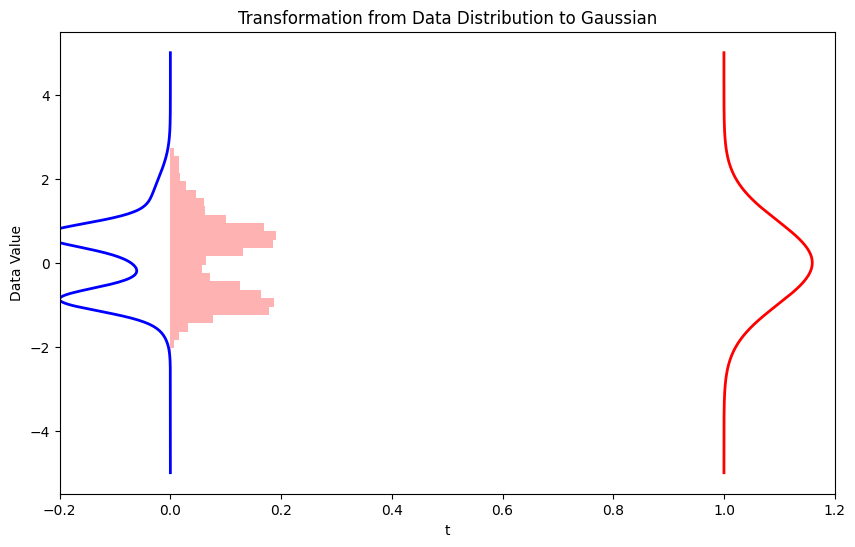

In [ ]:
# NOTE: This code block can takle up to 5 minutes to run.

# indices = [1] # range(10) #range(n_samples)
# show_histogram = False

# indices = range(10) #range(n_samples)
# show_histogram = False

indices = range(N)
show_histogram = True

n_frames = 50

# Generate data for the complex and Gaussian distributions
xs = torch.linspace(-5, 5, 400)
y_complex = torch.exp(gmm.log_prob(xs)) * 0.4

gaussian = D.Normal(0, 1)
y_gaussian = torch.exp(gaussian.log_prob(xs)) * 0.4

# Create the figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the complex data distribution on the left
ax.plot(y_complex * -1 - 0, xs, 'b-', lw=2, label='Prior (Data) Distribution')

# Plot the Gaussian distribution on the right
ax.plot(y_gaussian + 1, xs, 'r-', lw=2, label='Gaussian Distribution')

# Customize the plot
ax.set_title('Transformation from Data Distribution to Gaussian')
ax.set_xlabel('t')
ax.set_ylabel('Data Value')
ax.set_xlim([-.2, 1.2])

trajectory_plots = []
for i in range(len(indices)):
  plt_tmp, = ax.plot([], [])
  trajectory_plots.append(plt_tmp)

ts = torch.linspace(0, 1, T)

bars = None

def ani(i):

      global bars
      # Remove old bars
      if bars is not None:
          for bar in bars:
              bar.remove()
      t = int((T / n_frames) * i) + 1

      for idx, i in enumerate(indices):
          trajectory_plots[idx].set_data(ts[:t], history[i, :t])

      if show_histogram:
        # Determine the histogram values without plotting it
        counts, bin_edges = np.histogram(history[indices, t-1], bins=25, density=True)
        counts = counts * 0.4
        bin_centers = ((bin_edges[:-1] + bin_edges[1:]) / 2)
        height = bin_edges[1] - bin_edges[0]

        # Arbitrary position for the histogram base
        histogram_base = ts[t-1]

        bars = []
        # Create a bar plot to represent the histogram
        for count, bin_center in zip(counts, bin_centers):
            bars.append(ax.barh(bin_center, count, height=height, left=histogram_base, color='red', alpha=0.3))


ani = animation.FuncAnimation(fig, ani, frames=range(n_frames), interval=50)

html5_video = ani.to_html5_video()

# Replace the autoplay attribute with a blank string to disable autoplay
html5_video_no_autoplay = html5_video.replace("autoplay", "")
html5_video_no_loop = html5_video_no_autoplay.replace("loop", "")
HTML(html5_video_no_autoplay)


## 3. Images
Hopefully the animation above gave some intuition about how we can use a Markov Model to redistribute samples from one complex distribution to a different target distribution. The form of this target distribution is in this case determined by the type of conditional probability distributions used. Later in the course we will see many more applications of this.

Before we get to those parts of the course, it will be useful to already study how we can use a Markov Model defined using a simple Normal distribution to add noise to a *datasample*. We will be looking at this task specifically at the realms of images.

Below we have provided the code to download an image given a link. Feel free to swap this out for a different image. In other words, what this codeblock is doing is that it is sampling from our data distribution $p(x)$, where in this case $p(x)$ is a delta distribution at our given sample.

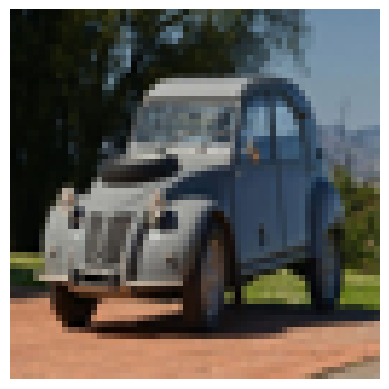

In [ ]:
def download_and_transform_image(url, size=(64, 64)):
    # Download the image
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))

    # Resize the image
    img_resized = img.resize(size)

    # Convert the image to a PyTorch tensor
    tensor = TF.to_tensor(img_resized)

    return tensor

# Example usage
url = 'https://images0.persgroep.net/rcs/PFA2ItW5qZXPTBTtpHYtTIMGhsc/diocontent/122975288/_fitwidth/694/?appId=21791a8992982cd8da851550a453bd7f&quality=0.8'  # Replace with your actual image URL
tensor_image = download_and_transform_image(url)

# Visualize the tensor as an image
plt.imshow(tensor_image.permute(1, 2, 0))  # Rearrange dimensions to (H, W, C) for matplotlib
plt.axis('off')  # Hide axes for better visualization
plt.show()

If correctly implemented, we can follow the same Markov Model as before. If you run the codeblock below this should give us some intuition about what this noising process exactly does; it destroys all information within the image. Or, more concretely, it transforms a distribution with 0 entropy (the delta distribution over our one sample), into the a higher entropy distribution (the normal distribution).

In [ ]:
T = 100
x = tensor_image.clone()
beta_max = 1.

# Prepare an empty list to hold the frames
frames = []
frames.append(x.permute(1, 2, 0).numpy())
for t in tqdm(range(0, T)):
    beta = scheduler(t, T)
    x = next_state(x, beta)
    if (t % 5) == 0: # Only save image every 5 steps to reduce running time.
      frames.append(x.permute(1, 2, 0).numpy())
frames.append(x.permute(1, 2, 0).numpy())

100%|██████████| 100/100 [00:00<00:00, 5110.14it/s]


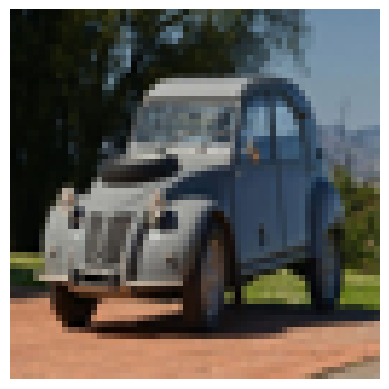

In [ ]:
# Define the update function for the animation
def update(frame):
    plt.imshow(np.clip(frame, 0, 1) , interpolation='nearest')
    plt.axis('off')

fig, ax = plt.subplots()

# Create an animation
ani = animation.FuncAnimation(fig, update, frames=frames, interval=50)

html5_video = ani.to_html5_video()

# Replace the autoplay attribute with a blank string to disable autoplay
html5_video_no_autoplay = html5_video.replace("autoplay", "")
html5_video_no_loop = html5_video_no_autoplay.replace("loop", "")
HTML(html5_video_no_autoplay)

# 4. Reverting the noising process
While using a Markov Model to turn an image into noise looks fun, it is not particularly useful in any situations. What is often more interesting is to do the reverse process; given some random noise, apply a Markov model, and obtain a denoised image.

In fact, this reverse process is exactly what models such as Diffusion Models and VAEs do.

In the code below we have implemented a very simple denoising process. We can use this to sample an arbitrary sample from our normal distribution and consecutively denoise it to obtain our target image.

> **Task:** Why does the denoising process as defined here work? Would it also work if we instead had a dataset of multiple images?

*Answer:*
The denoising process as defined here work because the noise are iterative refined by the Diffusion models step toward the known target image.

If we had a dataset of multiple image, the denoising process would not work , because each image would have different noise patterns making the denoising process impossible to come out with a desired target.

In [ ]:
url = 'https://pictures.porsche.com/rtt/iris?COSY-EU-100-1711coMvsi60AAt5FwcmBEgA4qP8iBUDxPE3Cb9pNXABuN9dMGF4tl3U0%25z8rMHIspbWvanYb%255y%25oq%25vSTmjMXD4qAZeoNBPUSfUx4RmWBisGK7Zlp0KtYYF%25mVSW8uAVbsqYStpP0iO5M5RUHcTCkF0GXoq1rfqr6FObtJ9wRuT0k%25Gx7e2HLec1UBXCfHaYXZaijhwhTCh0Qw9sJRzPf7KPf'  # Replace with your actual image URL
x_target = download_and_transform_image(url)

n_steps = 100
x = tensor_image.clone()
beta_max = 1.

x = torch.randn_like(x)

frames = []

frames.append(x.permute(1, 2, 0).numpy())
for t in tqdm(range(n_steps,-1,-1)):
    beta = scheduler(t, T)
    x = torch.sqrt(torch.tensor(1-beta)) * x_target + torch.sqrt(torch.tensor(beta)) * torch.randn_like(x)
    if (t % 5) == 0:
      frames.append(x.permute(1, 2, 0).numpy())  # Convert tensor to numpy array and store
frames.append(x.permute(1, 2, 0).numpy())


100%|██████████| 101/101 [00:00<00:00, 3032.45it/s]


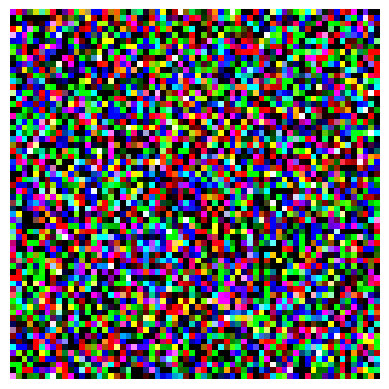

In [ ]:

# Define the update function for the animation
def update(frame):
    plt.imshow(np.clip(frame, 0, 1), interpolation='nearest')
    plt.axis('off')

fig, ax = plt.subplots()

# Create an animation
ani = animation.FuncAnimation(fig, update, frames=frames, interval=50)

html5_video = ani.to_html5_video()

# Replace the autoplay attribute with a blank string to disable autoplay
html5_video_no_autoplay = html5_video.replace("autoplay", "")
html5_video_no_loop = html5_video_no_autoplay.replace("loop", "")
HTML(html5_video_no_autoplay)